# Setup
We need datasets, dataloaders, and code to train and evaluate models

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
from models import *
from data_structures import *
from helpers import load_from_hdf5

In [3]:
# X, y = load_from_hdf5("../../sample_windows.h5")
X, y = load_from_hdf5("../../engine_windows_sample_scaled.h5")

class_count = 2
threshold = 20
#int_y = (y // class_count) 
int_y = (y >= threshold).astype(int)

In [4]:
X.shape

(500000, 50, 33)

In [5]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# 1d CNN
First, let's try a one dimensional CNN to capture temporal relationships within each feature.

In [43]:
train_loader, test_loader = create_train_test_dataloaders(X, int_y, max_samples_per_class=20000)

In [48]:
num_feats = 33
model = CNNRULClassifier(num_features=num_feats, num_classes=class_count).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 20 

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 2.2429, Test Loss: 2.1700
Epoch 2/20, Train Loss: 1.7337, Test Loss: 1.6860
Epoch 3/20, Train Loss: 1.4633, Test Loss: 1.3586
Epoch 4/20, Train Loss: 1.3379, Test Loss: 1.2792
Epoch 5/20, Train Loss: 1.2954, Test Loss: 1.4078
Epoch 6/20, Train Loss: 1.2710, Test Loss: 1.2351
Epoch 7/20, Train Loss: 1.2570, Test Loss: 1.2500
Epoch 8/20, Train Loss: 1.2525, Test Loss: 1.2698
Epoch 9/20, Train Loss: 1.2366, Test Loss: 1.4075


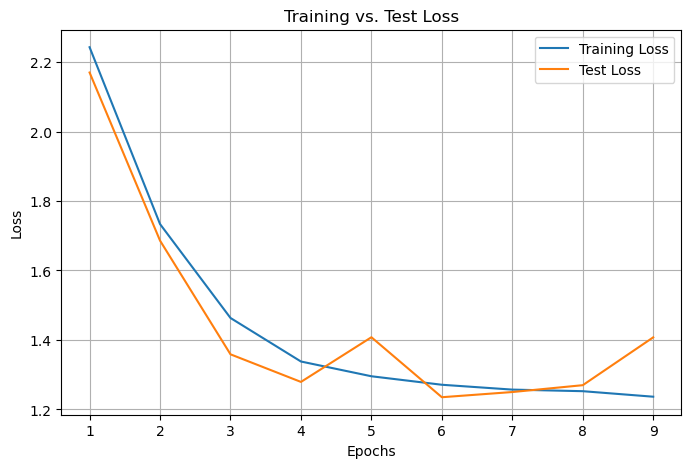

In [49]:
plot_loss(history)

In [50]:
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")

Model Accuracy: 42.20%


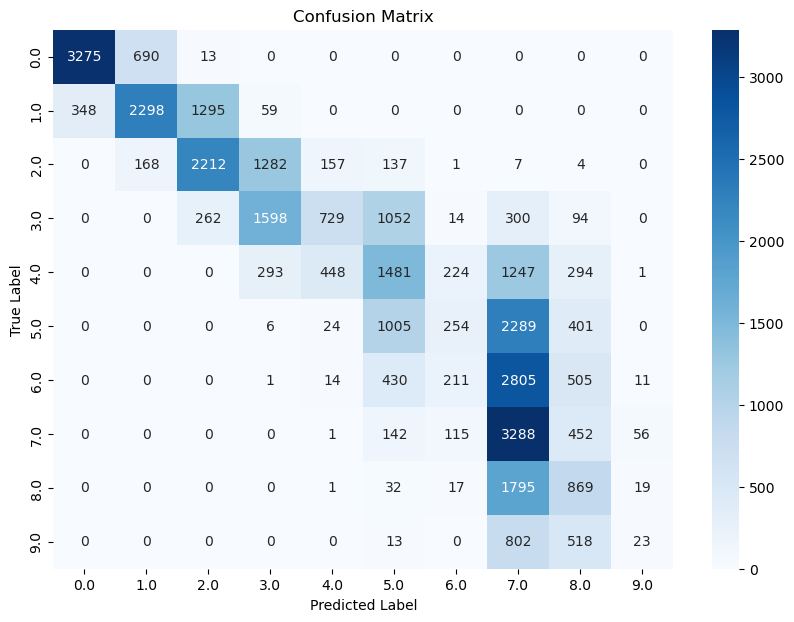

In [51]:
plot_confusion_matrix(actual_rul, pred_rul)

# 2d CNN
Now, let's try out a two dimensional CNN to capture interactions among features.

In [52]:
train_loader, test_loader = create_train_test_dataloaders(X, int_y, max_samples_per_class=20000, dim="2d")

In [54]:
num_feats = 33
model = CNNRUL2DClassifier(num_features=num_feats, num_classes=class_count).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
num_epochs = 20 

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/20, Train Loss: 1.9935, Test Loss: 1.6371
Epoch 2/20, Train Loss: 1.4856, Test Loss: 1.4525
Epoch 3/20, Train Loss: 1.3772, Test Loss: 1.3333
Epoch 4/20, Train Loss: 1.3233, Test Loss: 1.2952
Epoch 5/20, Train Loss: 1.2918, Test Loss: 1.3369
Epoch 6/20, Train Loss: 1.2700, Test Loss: 1.2512
Epoch 7/20, Train Loss: 1.2561, Test Loss: 1.2561
Epoch 8/20, Train Loss: 1.2432, Test Loss: 1.3005
Epoch 9/20, Train Loss: 1.2315, Test Loss: 1.3217
Epoch 10/20, Train Loss: 1.2230, Test Loss: 1.2677


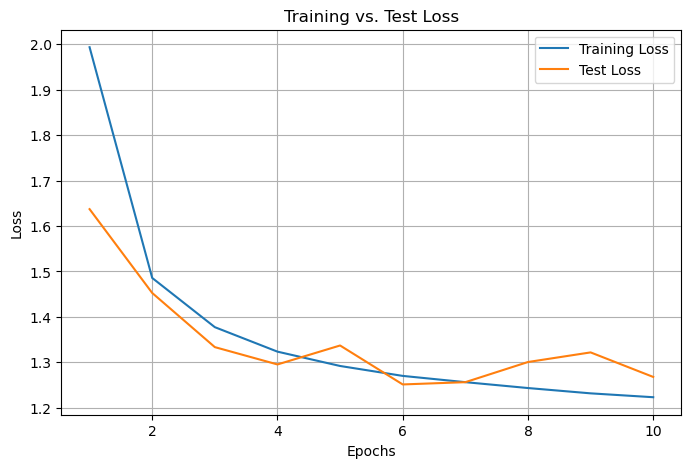

In [55]:
plot_loss(history)

In [56]:
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")

Model Accuracy: 44.06%


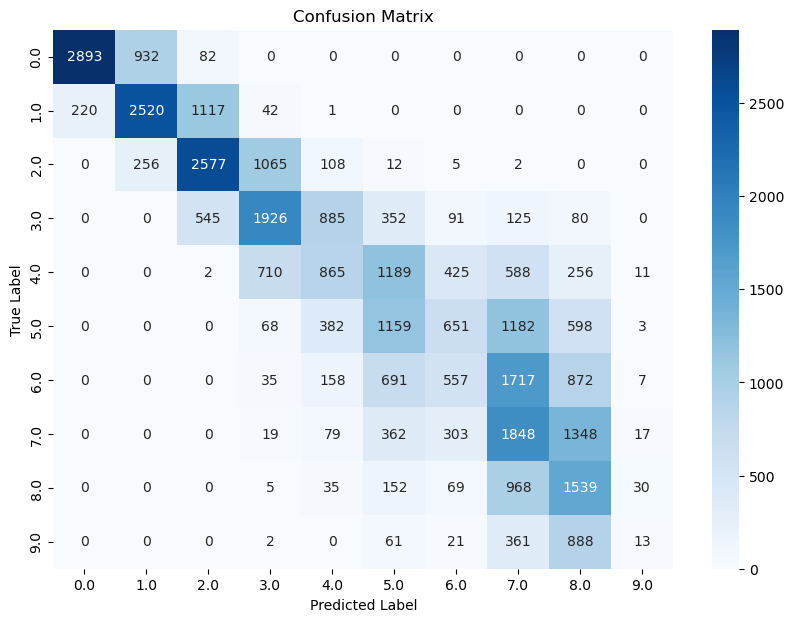

In [57]:
plot_confusion_matrix(actual_rul, pred_rul)

# Hybrid CNN
Now, let's try a hybrid CNN that uses both 1d and 2d convolutions.

In [58]:
train_loader, test_loader = create_train_test_dataloaders(X, int_y, max_samples_per_class=20000)

In [63]:
num_feats = 33
model = HybridCNNClassifier(num_features=num_feats,seq_length=50, num_classes=class_count).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 30 

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)

Epoch 1/30, Train Loss: 2.2472, Test Loss: 2.2279
Epoch 2/30, Train Loss: 2.2053, Test Loss: 2.1833
Epoch 3/30, Train Loss: 2.1519, Test Loss: 2.1316
Epoch 4/30, Train Loss: 2.0864, Test Loss: 2.0559
Epoch 5/30, Train Loss: 2.0133, Test Loss: 1.9794
Epoch 6/30, Train Loss: 1.9427, Test Loss: 1.9137
Epoch 7/30, Train Loss: 1.8855, Test Loss: 1.8623
Epoch 8/30, Train Loss: 1.8368, Test Loss: 1.8164
Epoch 9/30, Train Loss: 1.7950, Test Loss: 1.7780
Epoch 10/30, Train Loss: 1.7587, Test Loss: 1.7432
Epoch 11/30, Train Loss: 1.7259, Test Loss: 1.7130
Epoch 12/30, Train Loss: 1.6968, Test Loss: 1.6858
Epoch 13/30, Train Loss: 1.6700, Test Loss: 1.6606
Epoch 14/30, Train Loss: 1.6448, Test Loss: 1.6409
Epoch 15/30, Train Loss: 1.6215, Test Loss: 1.6174
Epoch 16/30, Train Loss: 1.6005, Test Loss: 1.5954
Epoch 17/30, Train Loss: 1.5803, Test Loss: 1.5759
Epoch 18/30, Train Loss: 1.5614, Test Loss: 1.5549
Epoch 19/30, Train Loss: 1.5449, Test Loss: 1.5390
Epoch 20/30, Train Loss: 1.5284, Test Lo

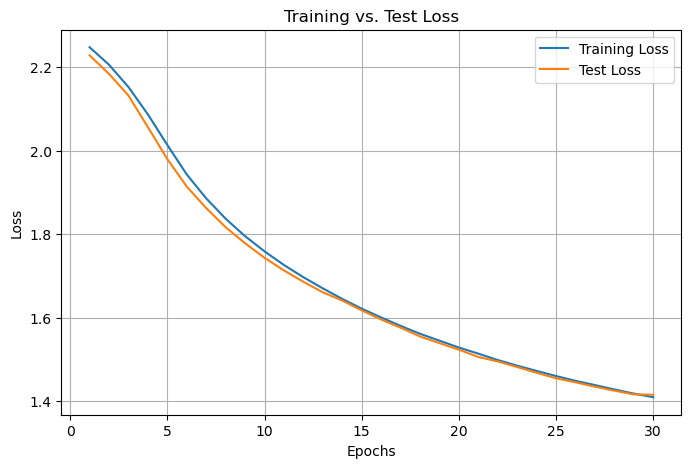

In [64]:
plot_loss(history)

In [65]:
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")

Model Accuracy: 44.47%


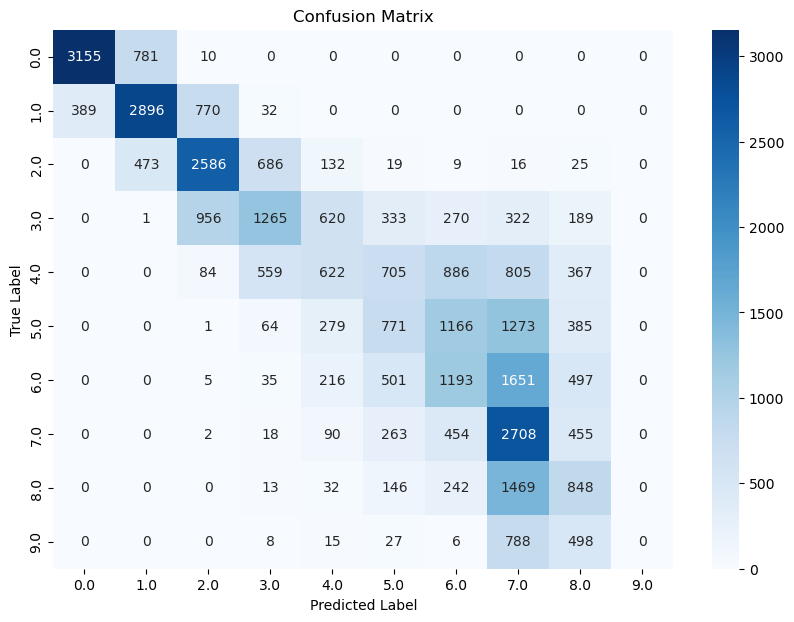

In [66]:
plot_confusion_matrix(actual_rul, pred_rul)

Epoch 1/30, Train Loss: 1.4007, Test Loss: 1.3986
Epoch 2/30, Train Loss: 1.3921, Test Loss: 1.3916
Epoch 3/30, Train Loss: 1.3842, Test Loss: 1.3802
Epoch 4/30, Train Loss: 1.3758, Test Loss: 1.3811
Epoch 5/30, Train Loss: 1.3692, Test Loss: 1.3680
Epoch 6/30, Train Loss: 1.3616, Test Loss: 1.3585
Epoch 7/30, Train Loss: 1.3548, Test Loss: 1.3598
Epoch 8/30, Train Loss: 1.3488, Test Loss: 1.3504
Epoch 9/30, Train Loss: 1.3423, Test Loss: 1.3401
Epoch 10/30, Train Loss: 1.3372, Test Loss: 1.3411
Epoch 11/30, Train Loss: 1.3306, Test Loss: 1.3290
Epoch 12/30, Train Loss: 1.3247, Test Loss: 1.3414
Epoch 13/30, Train Loss: 1.3199, Test Loss: 1.3176
Epoch 14/30, Train Loss: 1.3144, Test Loss: 1.3140
Epoch 15/30, Train Loss: 1.3095, Test Loss: 1.3113
Epoch 16/30, Train Loss: 1.3052, Test Loss: 1.3054
Epoch 17/30, Train Loss: 1.3007, Test Loss: 1.3013
Epoch 18/30, Train Loss: 1.2959, Test Loss: 1.2999
Epoch 19/30, Train Loss: 1.2917, Test Loss: 1.3227
Epoch 20/30, Train Loss: 1.2878, Test Lo

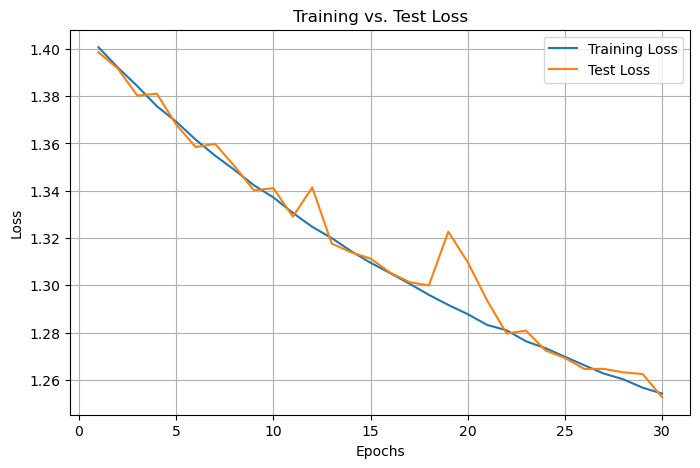

Model Accuracy: 48.31%


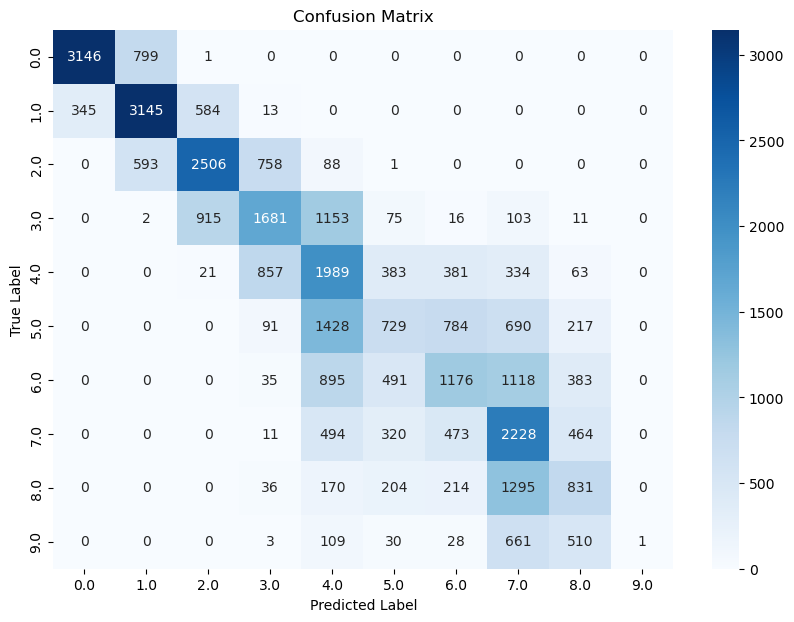

In [67]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

Epoch 1/30, Train Loss: 1.2507, Test Loss: 1.2494
Epoch 2/30, Train Loss: 1.2477, Test Loss: 1.2660
Epoch 3/30, Train Loss: 1.2455, Test Loss: 1.2474
Epoch 4/30, Train Loss: 1.2426, Test Loss: 1.2478
Epoch 5/30, Train Loss: 1.2408, Test Loss: 1.2407
Epoch 6/30, Train Loss: 1.2380, Test Loss: 1.2365
Epoch 7/30, Train Loss: 1.2359, Test Loss: 1.2350
Epoch 8/30, Train Loss: 1.2331, Test Loss: 1.2319
Epoch 9/30, Train Loss: 1.2308, Test Loss: 1.2315
Epoch 10/30, Train Loss: 1.2289, Test Loss: 1.2329
Epoch 11/30, Train Loss: 1.2271, Test Loss: 1.2278
Epoch 12/30, Train Loss: 1.2242, Test Loss: 1.2238
Epoch 13/30, Train Loss: 1.2231, Test Loss: 1.2284
Epoch 14/30, Train Loss: 1.2203, Test Loss: 1.2298
Epoch 15/30, Train Loss: 1.2186, Test Loss: 1.2194
Epoch 16/30, Train Loss: 1.2161, Test Loss: 1.2147
Epoch 17/30, Train Loss: 1.2147, Test Loss: 1.2177
Epoch 18/30, Train Loss: 1.2136, Test Loss: 1.2132
Epoch 19/30, Train Loss: 1.2111, Test Loss: 1.2126
Epoch 20/30, Train Loss: 1.2094, Test Lo

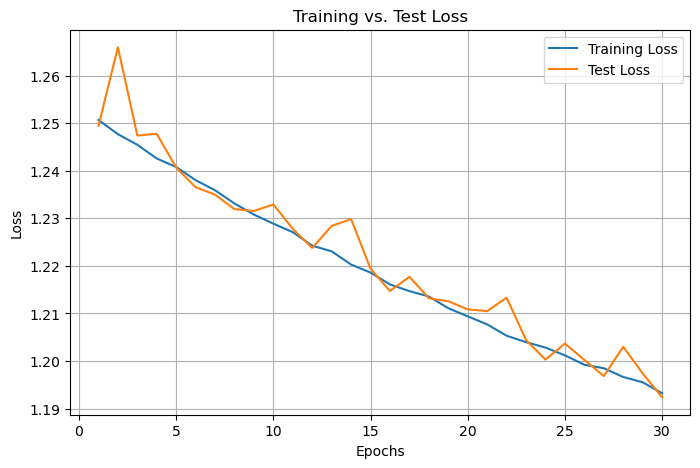

Model Accuracy: 48.78%


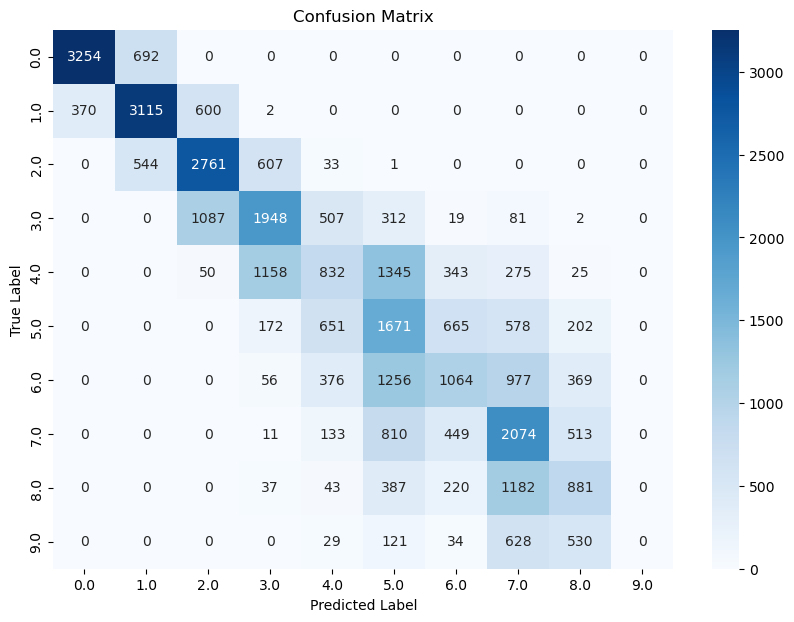

In [68]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

In [69]:
torch.save(model.state_dict(), 'hybrid_state_dict.pth')

Epoch 1/30, Train Loss: 1.2163, Test Loss: 1.1933
Epoch 2/30, Train Loss: 1.2092, Test Loss: 1.2008
Epoch 3/30, Train Loss: 1.2044, Test Loss: 1.1964
Epoch 4/30, Train Loss: 1.1986, Test Loss: 1.1876
Epoch 5/30, Train Loss: 1.1939, Test Loss: 1.2138
Epoch 6/30, Train Loss: 1.1879, Test Loss: 1.1698
Epoch 7/30, Train Loss: 1.1860, Test Loss: 1.2805
Epoch 8/30, Train Loss: 1.1816, Test Loss: 1.1612
Epoch 9/30, Train Loss: 1.1775, Test Loss: 1.1751
Epoch 10/30, Train Loss: 1.1723, Test Loss: 1.1694
Epoch 11/30, Train Loss: 1.1676, Test Loss: 1.2084
Epoch 12/30, Train Loss: 1.1656, Test Loss: 1.1610
Epoch 13/30, Train Loss: 1.1639, Test Loss: 1.1813
Epoch 14/30, Train Loss: 1.1610, Test Loss: 1.2158
Epoch 15/30, Train Loss: 1.1564, Test Loss: 1.1548
Epoch 16/30, Train Loss: 1.1561, Test Loss: 1.3356
Epoch 17/30, Train Loss: 1.1522, Test Loss: 1.1393
Epoch 18/30, Train Loss: 1.1527, Test Loss: 1.1401
Epoch 19/30, Train Loss: 1.1453, Test Loss: 1.1613
Epoch 20/30, Train Loss: 1.1450, Test Lo

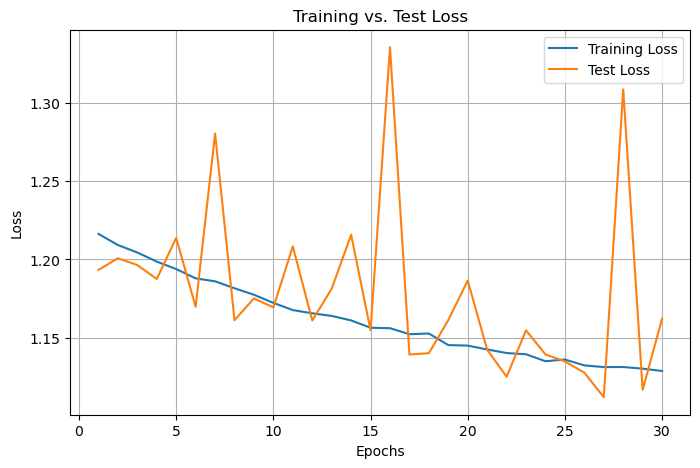

Model Accuracy: 49.06%


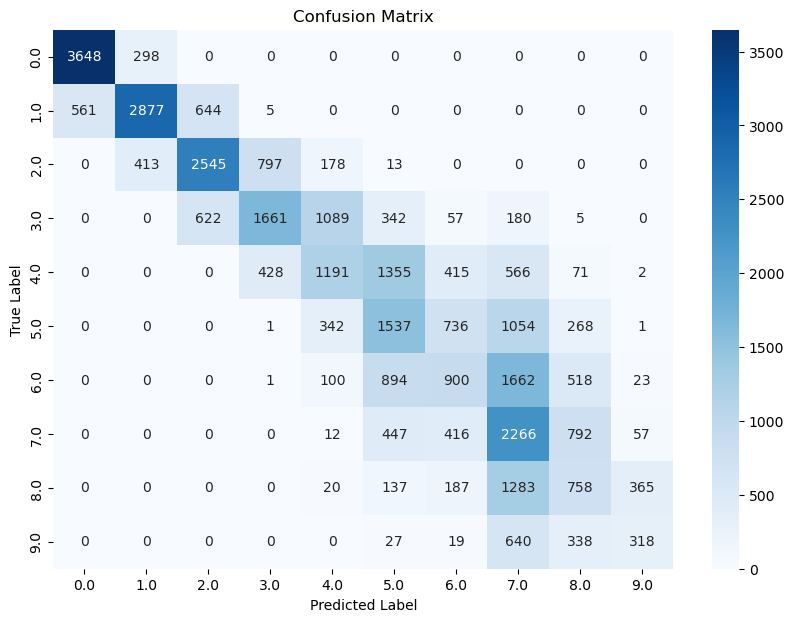

In [70]:
optimizer = optim.Adam(model.parameters(), lr=0.00005)

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

Epoch 1/30, Train Loss: 1.0943, Test Loss: 1.0927
Epoch 2/30, Train Loss: 1.0938, Test Loss: 1.0939
Epoch 3/30, Train Loss: 1.0932, Test Loss: 1.0938
Epoch 4/30, Train Loss: 1.0932, Test Loss: 1.1060
Epoch 5/30, Train Loss: 1.0929, Test Loss: 1.0927
Epoch 6/30, Train Loss: 1.0931, Test Loss: 1.0966
Epoch 7/30, Train Loss: 1.0921, Test Loss: 1.0930
Epoch 8/30, Train Loss: 1.0917, Test Loss: 1.0910
Epoch 9/30, Train Loss: 1.0923, Test Loss: 1.0959
Epoch 10/30, Train Loss: 1.0908, Test Loss: 1.0921
Epoch 11/30, Train Loss: 1.0912, Test Loss: 1.0938
Epoch 12/30, Train Loss: 1.0893, Test Loss: 1.1004
Epoch 13/30, Train Loss: 1.0898, Test Loss: 1.0891
Epoch 14/30, Train Loss: 1.0898, Test Loss: 1.0883
Epoch 15/30, Train Loss: 1.0888, Test Loss: 1.0875
Epoch 16/30, Train Loss: 1.0885, Test Loss: 1.0910
Epoch 17/30, Train Loss: 1.0894, Test Loss: 1.1021
Epoch 18/30, Train Loss: 1.0883, Test Loss: 1.0865
Epoch 19/30, Train Loss: 1.0881, Test Loss: 1.0874
Epoch 20/30, Train Loss: 1.0877, Test Lo

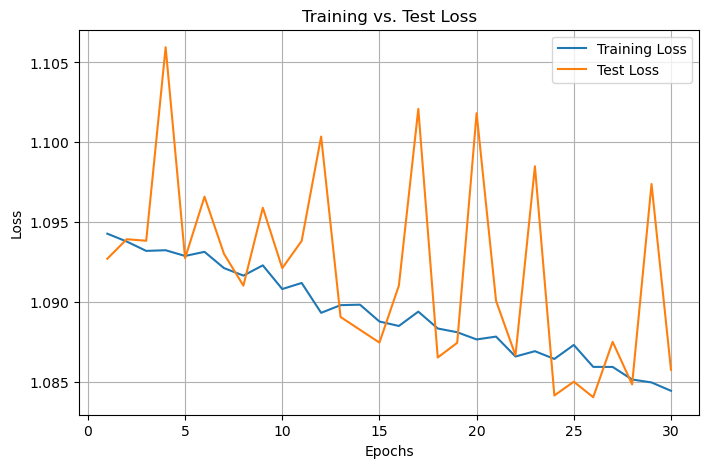

Model Accuracy: 51.16%


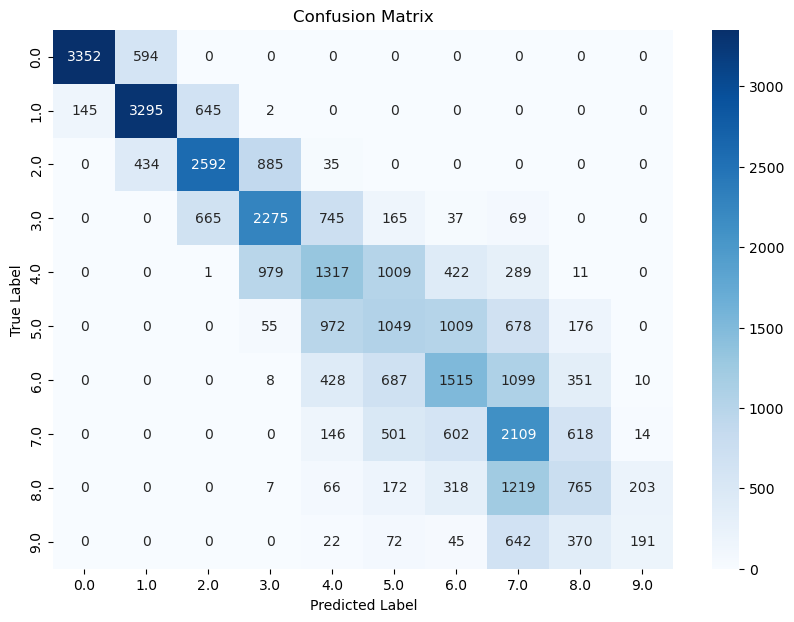

In [72]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

In [73]:
torch.save(model.state_dict(), 'hybrid_state_dict.pth')

# New Idea

In [11]:
train_loader, test_loader = create_train_test_dataloaders(X, int_y, max_samples_per_class=20000)

In [12]:
num_feats = 33
model = HybridCNNClassifier(num_features=num_feats,seq_length=50, num_classes=class_count).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
num_epochs = 30 

Epoch 1/30, Train Loss: 0.6625, Test Loss: 0.6433
Epoch 2/30, Train Loss: 0.6212, Test Loss: 0.5986
Epoch 3/30, Train Loss: 0.5816, Test Loss: 0.5578
Epoch 4/30, Train Loss: 0.5398, Test Loss: 0.5157
Epoch 5/30, Train Loss: 0.4970, Test Loss: 0.4703
Epoch 6/30, Train Loss: 0.4561, Test Loss: 0.4286
Epoch 7/30, Train Loss: 0.4178, Test Loss: 0.3916
Epoch 8/30, Train Loss: 0.3828, Test Loss: 0.3593
Epoch 9/30, Train Loss: 0.3516, Test Loss: 0.3390
Epoch 10/30, Train Loss: 0.3237, Test Loss: 0.3024
Epoch 11/30, Train Loss: 0.2995, Test Loss: 0.2797
Epoch 12/30, Train Loss: 0.2781, Test Loss: 0.2633
Epoch 13/30, Train Loss: 0.2599, Test Loss: 0.2415
Epoch 14/30, Train Loss: 0.2440, Test Loss: 0.2318
Epoch 15/30, Train Loss: 0.2280, Test Loss: 0.2120
Epoch 16/30, Train Loss: 0.2151, Test Loss: 0.2055
Epoch 17/30, Train Loss: 0.2030, Test Loss: 0.1883
Epoch 18/30, Train Loss: 0.1927, Test Loss: 0.1784
Epoch 19/30, Train Loss: 0.1819, Test Loss: 0.1703
Epoch 20/30, Train Loss: 0.1722, Test Lo

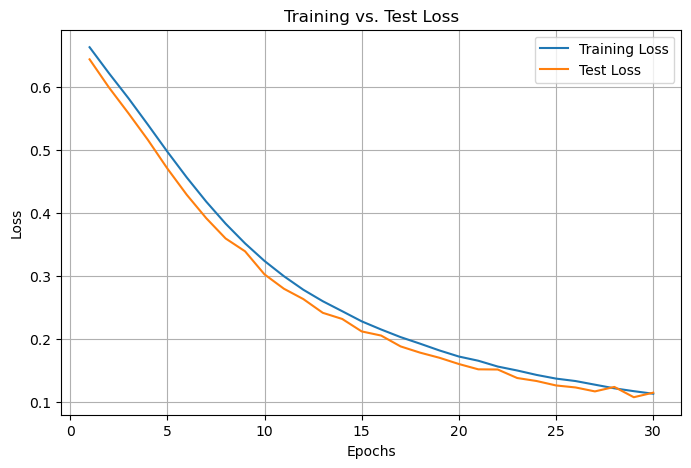

Model Accuracy: 97.35%


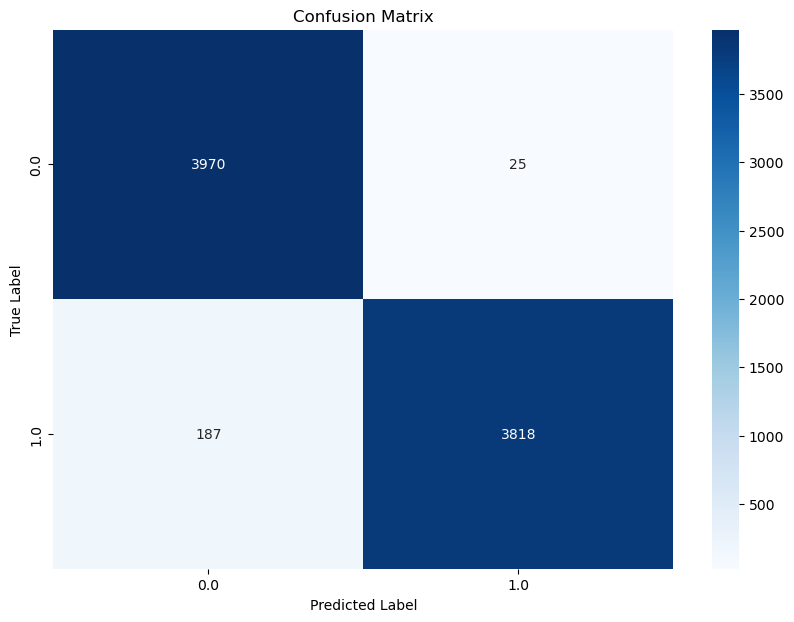

In [13]:
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

In [6]:
threshold = 20
idxs = np.where(y < threshold)[0]
small_X = X[idxs]
small_y = y[idxs]

In [7]:
vals, counts = np.unique(small_y, return_counts=True)
print(min(counts))

6599


In [8]:
for i in range(len(vals)):
    print(vals[i], counts[i])

0.0 7135
1.0 6735
2.0 7048
3.0 6647
4.0 6925
5.0 7085
6.0 6775
7.0 6738
8.0 6892
9.0 6783
10.0 6734
11.0 6822
12.0 6688
13.0 7369
14.0 6599
15.0 6726
16.0 6810
17.0 6879
18.0 7030
19.0 6749


In [9]:
train_loader, test_loader = create_train_test_dataloaders(small_X, small_y, max_samples_per_class=6599)

Balancing classes...
Train set size: 105584, Test set size: 26396


In [10]:
len(test_loader)

413

In [11]:
num_classes = 20
num_feats = 33
model = ComplexHybridCNNClassifier(num_features=num_feats,seq_length=50, num_classes=class_count).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)
num_epochs = 50

Epoch 1/50, Train Loss: 0.0688, Test Loss: 0.0684
Epoch 2/50, Train Loss: 0.0677, Test Loss: 0.0676
Epoch 3/50, Train Loss: 0.0670, Test Loss: 0.0676
Epoch 4/50, Train Loss: 0.0663, Test Loss: 0.0663
Epoch 5/50, Train Loss: 0.0655, Test Loss: 0.0651
Epoch 6/50, Train Loss: 0.0647, Test Loss: 0.0648
Epoch 7/50, Train Loss: 0.0637, Test Loss: 0.0641
Epoch 8/50, Train Loss: 0.0627, Test Loss: 0.0623
Epoch 9/50, Train Loss: 0.0615, Test Loss: 0.0608
Epoch 10/50, Train Loss: 0.0607, Test Loss: 0.0605
Epoch 11/50, Train Loss: 0.0596, Test Loss: 0.0590
Epoch 12/50, Train Loss: 0.0589, Test Loss: 0.0622
Epoch 13/50, Train Loss: 0.0584, Test Loss: 0.0583
Epoch 14/50, Train Loss: 0.0579, Test Loss: 0.0594
Epoch 15/50, Train Loss: 0.0570, Test Loss: 0.0579
Epoch 16/50, Train Loss: 0.0560, Test Loss: 0.0573
Epoch 17/50, Train Loss: 0.0560, Test Loss: 0.0564
Epoch 18/50, Train Loss: 0.0556, Test Loss: 0.0565
Epoch 19/50, Train Loss: 0.0545, Test Loss: 0.0554
Epoch 20/50, Train Loss: 0.0544, Test Lo

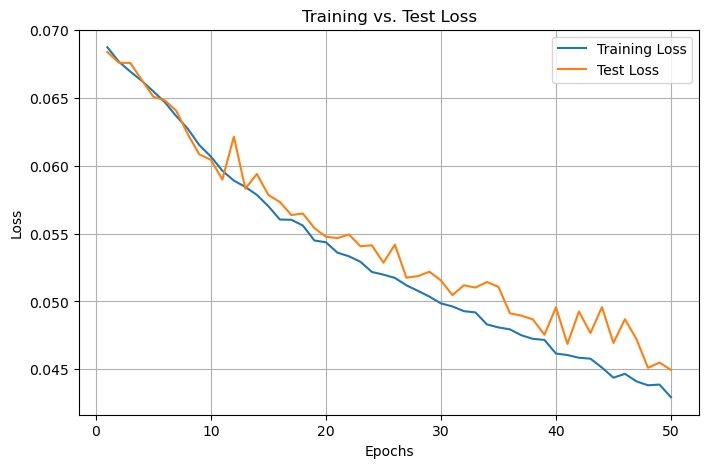

Model Accuracy: 7.55%


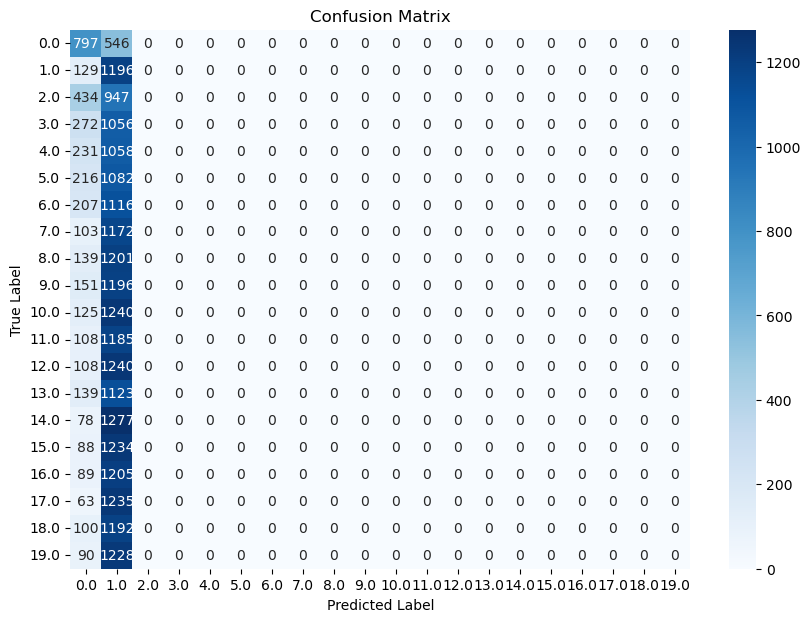

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

In [13]:
torch.save(model.state_dict(), 'complex_state_dict.pth')

In [6]:
state_dict = torch.load('complex_state_dict.pth')

In [8]:
model.load_state_dict(state_dict)

<All keys matched successfully>

Model Accuracy: 7.75%


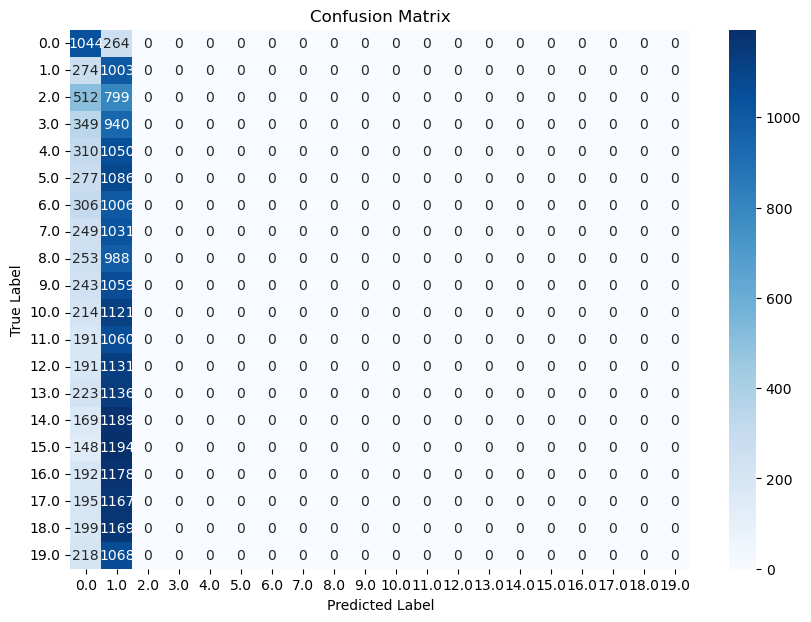

In [15]:
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)

Epoch 1/50, Train Loss: 0.0588, Test Loss: 0.0529
Epoch 2/50, Train Loss: 0.0578, Test Loss: 0.0535
Epoch 3/50, Train Loss: 0.0571, Test Loss: 0.0519
Epoch 4/50, Train Loss: 0.0552, Test Loss: 0.0553
Epoch 5/50, Train Loss: 0.0542, Test Loss: 0.0529
Epoch 6/50, Train Loss: 0.0532, Test Loss: 0.0511
Epoch 7/50, Train Loss: 0.0525, Test Loss: 0.0526
Epoch 8/50, Train Loss: 0.0515, Test Loss: 0.0740
Epoch 9/50, Train Loss: 0.0513, Test Loss: 0.0482
Epoch 10/50, Train Loss: 0.0500, Test Loss: 0.0493
Epoch 11/50, Train Loss: 0.0495, Test Loss: 0.0483
Epoch 12/50, Train Loss: 0.0486, Test Loss: 0.0561
Epoch 13/50, Train Loss: 0.0476, Test Loss: 0.0443
Epoch 14/50, Train Loss: 0.0471, Test Loss: 0.0457
Epoch 15/50, Train Loss: 0.0471, Test Loss: 0.0688
Epoch 16/50, Train Loss: 0.0466, Test Loss: 0.0451
Epoch 17/50, Train Loss: 0.0453, Test Loss: 0.0435
Epoch 18/50, Train Loss: 0.0451, Test Loss: 0.0566
Epoch 19/50, Train Loss: 0.0444, Test Loss: 0.0441
Epoch 20/50, Train Loss: 0.0435, Test Lo

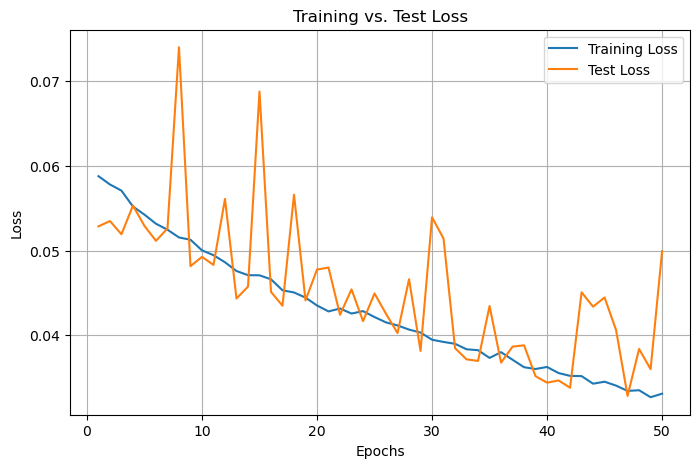

Model Accuracy: 7.43%


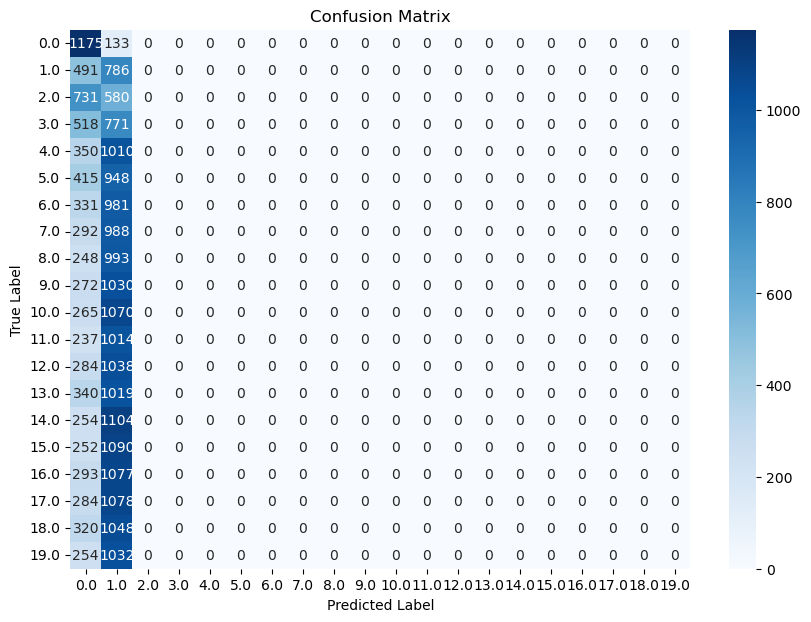

In [16]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
history = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=num_epochs)
plot_loss(history)
pred_rul, actual_rul = model.get_predict_and_true(test_loader, device)
acc = calculate_accuracy(pred_rul, actual_rul) * 100
print(f"Model Accuracy: {acc:.2f}%")
plot_confusion_matrix(actual_rul, pred_rul)